    NAMA  : Agung Setiawan
    NIM   : 09011281722039
    KELAS : SK5A
    MK    : KECERDASAN BUATAN (Artificial Intelligent)
    DOSEN : Prof.Dr.Ir. Siti Nurmaini,M.T.

<h1 align="center">PEMODELAN SISTEM KONTROL TRAFFIC LIGHT BERDASARKAN KEPADATAN KENDARAAN DENGAN TEKNIK EDGE DETECTION DAN LOGIKA FUZZY </h1>

***SHORTCUT***

* [FUZZIFIKASI](#fuzzy)
* [RULES EVALUATION](#rules)
* [MEKANISME INFERENSI](#mekanisme)
* [DEFUZZIFIKASI](#defuzz)
* [PERHITUNGAN MANUAL](#manual)

Secara umum pengendalian lalu-lintas selama ini menggunakan pengatur lampu lalulintas (Trafic Light). Penggunaan Trafic Light memiliki kelemahan yaitu pengaturan kendaraan tidak berdasarkan kondisi real-time dari jumlah kendaraan tetapi berdasarkan waktu. Pemafaatan teknologi pengolahan citra digital dapat diterapkan pada sistem trafic light yaitu dengan mendeteksi jumlah kendaraan dari setiap sisi jalan. Pendeteksian jumlah kendaraan menggunakan metode deteksi tepi (edge detection) merupakan cara untuk mendeteksi kepadatan kendaraan.  Metode ini merupakan metode pemfilteran objek untuk mengambil informasi bagian tepi objek berupa data biner. Sedangkan untuk menghasilkan lama waktu yang akan diberikan pada setiap sisi traffic light maka digunakan logika Fuzzy dengan metode Min-Max, sebagai parameter yaitu berdasarkan perbandingan padat kendaran dari setiap sisi jalan. Hasil yang didapatkan yaitu jumlah waktu nyala lampu traffic light pada tiap-tiap ruas berdasarkan kepadatan kendaran, semakin padat kendaraan , maka waktu menyala lampu hijau semakin lama. 

## METODE FUZZY MAMDANI
Langkah-langkah dalam metode mamdani, antara lain:  
1. Pembentukan Himpunan Fuzzy (FUZZIFIKASI)
2. Pembentukan aturan-aturan dasar (RULES BASED)
3. Mekanisme Inferensi
4. Defuzifikasi

**Import Library**

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

## 1. FUZZIFIKASI <a class="anchor" id="fuzzy"></a>

### A.Variabel Input

Input Variabel : 
1. Variabel Jumlah Kendaraan Diatur(JKD)
2. Variabel Jumlah Kendaraan Selanjutnya(JKS) 

In [2]:
jkd = np.arange(1,11001,1)
jks = np.arange(1,11001,1)

- Range JKD [1 11000] kendaraan
- Range JKS [1 11000] kendaraan

**Keterangan**
- JKD = Jumlah Kendaraan Diatur
- JKS = Jumlah Kendaraan Selanjutnya

### B. Variabel Output

Output Variabel : 
1. Variabel Durasi Lampu(DL)

In [3]:
dl = np.arange(1,101,1)

- Range DL[1 100]

**Keterangan**
- DL = Durasi Lampu Hijau Selanjutnya

### C. Nilai Linguistik
Proses untuk mengubah variabel non numerik menjadi variabel fuzzy (linguistik)

Jumlah Kendaraan:
$$Tidak padat= 1-6000  Kendaraan$$
$$Normal = 4500-7500  Kendaraan$$
$$Padat = 6000-9000  Kendaraan$$
$$Sangat Padat = 7500-11000  Kendaraan$$

a. Nilai Linguistik pada Variabel JKD dan JKS ada 4, yaitu:

\begin{equation}
  JKD/JKS['TP'] = \mu TP(x)=\begin{cases}
    1, & \text{$1\leq x \leq 4500$}.\\
    \left.(4500 - x) \,  \right/(4500 - 1) , & \text{$4500 \leq x \leq 6000$}.\\
    0, & \text{$x\geq 6000$}.
  \end{cases}
  \\
    JKD/JKS['N'] = \mu N(x)=\begin{cases}
    0, & \text{$x\leq 4500$ atau $x\geq7500$}.\\
    \left.(x - 4500)\, \right/(6000 - 4500) , & \text{$4500 \leq x \leq 6000$}.\\
    \left.(6000 - x)\, \right/(7500 - 6000) , & \text{$6000 \leq x \leq 7500$}.\\
  \end{cases}
  \\
    JKD/JKS['P'] = \mu P(x)=\begin{cases}
    0, & \text{$x\leq 6000$ atau $x\geq9000$}.\\
    \left.(x - 6000)\, \right/(7500 - 6000) , & \text{$6000 \leq x \leq 7500$}.\\
    \left.(9000 - x)\, \right/(9000 - 7500) , & \text{$7500 \leq x \leq 9000$}.\\
  \end{cases}
  \\
   JKD/JKS['SP'] = \mu SP(x)=\begin{cases}
    0, & \text{$x\leq 7500$ atau $x\geq11000$}.\\
    \left.(x - 7500)\, \right/(9000 - 7500) , & \text{$7500 \leq x \leq 9000$}.\\
    \left.(11000 - x)\, \right/(11000 - 9000) , & \text{$9000 \leq x \leq 11000$}.\\
  \end{cases}
\end{equation}

b. Nilai Linguistik pada Variabel DL ada 4, yaitu:

\begin{equation}
  DL['C'] = \mu C(x)=\begin{cases}
    1, & \text{$1\leq x \leq 10$}.\\
    \left.(20 - x) \,  \right/(20 - 10) , & \text{$10 \leq x \leq 20$}.\\
    0, & \text{$x\geq 20$}.
  \end{cases}
  \\
    DL['SD'] = \mu SD(x)=\begin{cases}
    0, & \text{$x\leq 14$ atau $x\geq50$}.\\
    \left.(x - 14)\, \right/(18 - 14) , & \text{$14 \leq x \leq 18$}.\\
    \left.(50 - x)\, \right/(50 - 20) , & \text{$18 \leq x \leq 50$}.\\
  \end{cases}
  \\
    DL['AL'] = \mu AL(x)=\begin{cases}
    0, & \text{$x\leq 40$ atau $x\geq80$}.\\
    \left.(x - 40)\, \right/(60 - 40) , & \text{$40 \leq x \leq 60$}.\\
    \left.(80 - x)\, \right/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
  \end{cases}
  \\
   DL['L'] = \mu L(x)=\begin{cases}
    0, & \text{$x\leq 74$ atau $x\geq80$}.\\
    \left.(x - 74)\, \right/(80 - 74) , & \text{$74 \leq x \leq 80$}.\\
    \left.(100 - x)\, \right/(100 - 80) , & \text{$80 \leq x \leq 100$}.\\
  \end{cases}
\end{equation}

### D. Membership Function 
- Membership function yang digunakan trapmf dan trimf.

**RENTANG NILAI INPUT & OUTPUT**
- Variabel input Jumlah Kendaraan Diatur(JKD) memiliki rentang nilai dari 1 sampai 11000
- Variabel input Jumlah Kendaraan Selanjutnya(JKS) memiliki rentang nilai dari 1 sampai 11000
- Variabel Output Durasi Lampu(DL) memiliki rentang nilai dari 1 sampai 100

### Fuzzifikasi JKD dan JKD

#### Membership Function dari JKD dan JKS (Variabel Input)
- JKD & JKS  : Tidak padat, Normal, Padat, Sangat padat.

In [4]:
jkd = ctrl.Antecedent(np.arange(1,11001,1),'jkd')
jks = ctrl.Antecedent(np.arange(1,11001,1),'jks')

jkd_x = np.arange(1,11000,1)
jks_x = np.arange(1,11000,1)

Domain Himpunan Fuzzy Variabel Jumlah Kendaraan Diatur(JKD) dan Jumlah Kendaraan Selanjutnya(JKS):
1. **Tidak Padat** [1 - 6000] Kendaraan
2. **Normal** [4500 - 7500] Kendaraan
3. **Padat** [6000 - 9000] Kendaraan
4. **Sangat Padat** [7500 - 11000] Kendaraan

Menampilkan Input dan Output. Perintah Antecedent digunakan untuk input dan perintah Consequent digunakan untuk output.

In [5]:
jkd['TP'] = fuzz.trapmf(jkd.universe, [1,1,4500,6000])
jkd['N'] = fuzz.trimf(jkd.universe, [4500,6000,7500])
jkd['P'] = fuzz.trimf(jkd.universe, [6000,7500,9000])
jkd['SP'] = fuzz.trapmf(jkd.universe, [7500,9000,11000,11000])

jks['TP'] = fuzz.trapmf(jks.universe, [1,1,4500,6000])
jks['N'] = fuzz.trimf(jks.universe, [4500,6000,7500])
jks['P'] = fuzz.trimf(jks.universe, [6000,7500,9000])
jks['SP'] = fuzz.trapmf(jks.universe, [7500,9000,11000,11000])

Plotting fungsi keanggotaan $\mu TP(x)$ pada JKD & JKS

Text(0.5,1,'Tidak Padat(JKS)')

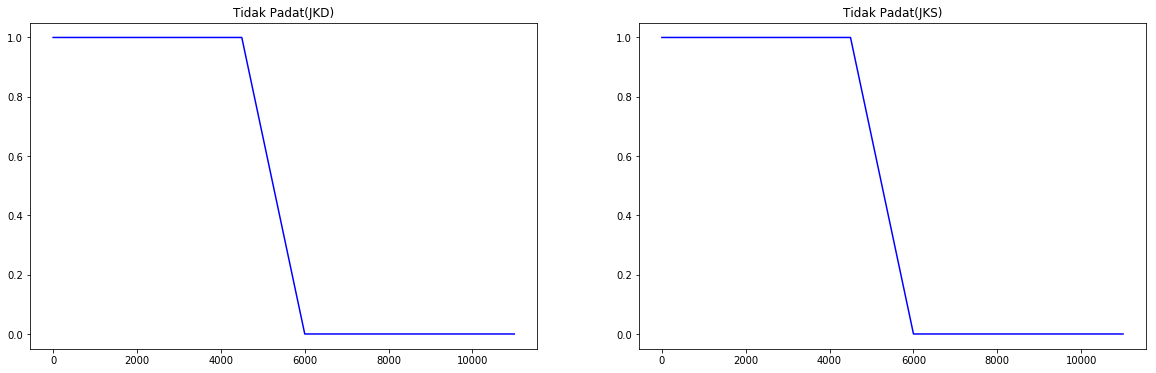

In [6]:
jkd_tp = fuzz.trapmf(jkd_x, [1,1,4500,6000])
jks_tp = fuzz.trapmf(jks_x, [1,1,4500,6000])
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20,6))
ax0.plot(jkd_x,jkd_tp, 'b', linewidth=1.5, label='JKD')
ax1.plot(jks_x,jks_tp, 'b', linewidth=1.5, label='JKS')
ax0.set_title('Tidak Padat(JKD)')
ax1.set_title('Tidak Padat(JKS)')

Plotting fungsi keanggotaan $\mu N(x)$ pada JKD & JKS

Text(0.5,1,'Normal(JKS)')

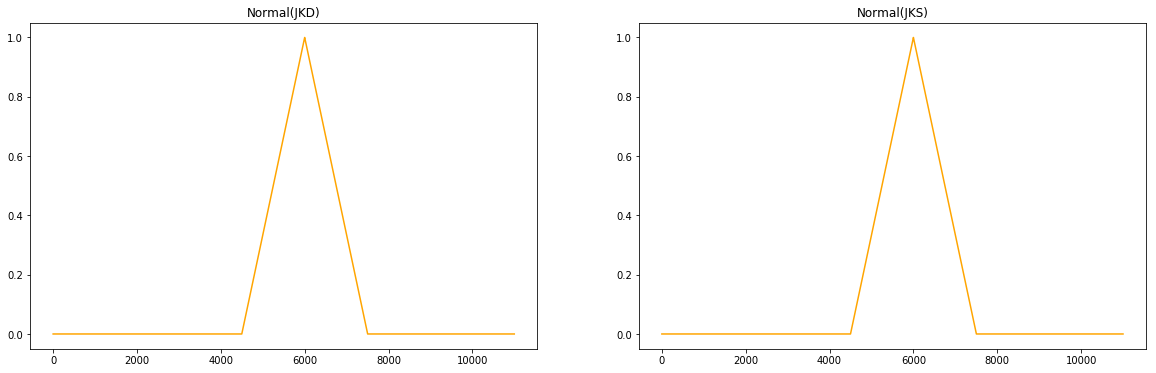

In [7]:
jkd_n = fuzz.trimf(jkd_x, [4500,6000,7500])
jks_n = fuzz.trimf(jks_x, [4500,6000,7500])
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20,6))
ax0.plot(jkd_x,jkd_n, 'orange', linewidth=1.5, label='JKD')
ax1.plot(jks_x,jks_n, 'orange', linewidth=1.5, label='JKS')
ax0.set_title('Normal(JKD)')
ax1.set_title('Normal(JKS)')

Plotting fungsi keanggotaan $\mu P(x)$ pada JKD & JKS

Text(0.5,1,'Padat(JKS)')

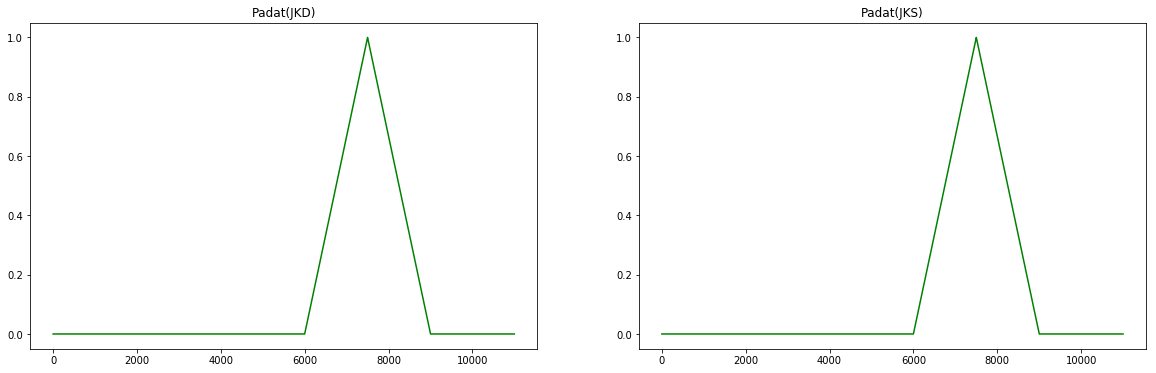

In [8]:
jkd_p = fuzz.trimf(jkd_x, [6000,7500,9000])
jks_p = fuzz.trimf(jks_x, [6000,7500,9000])
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20,6))
ax0.plot(jkd_x,jkd_p, 'green', linewidth=1.5, label='JKD')
ax1.plot(jks_x,jks_p, 'green', linewidth=1.5, label='JKS')
ax0.set_title('Padat(JKD)')
ax1.set_title('Padat(JKS)')

Plotting fungsi keanggotaan $\mu SP(x)$ pada JKD & JKS

Text(0.5,1,'Sangat Padat(JKS)')

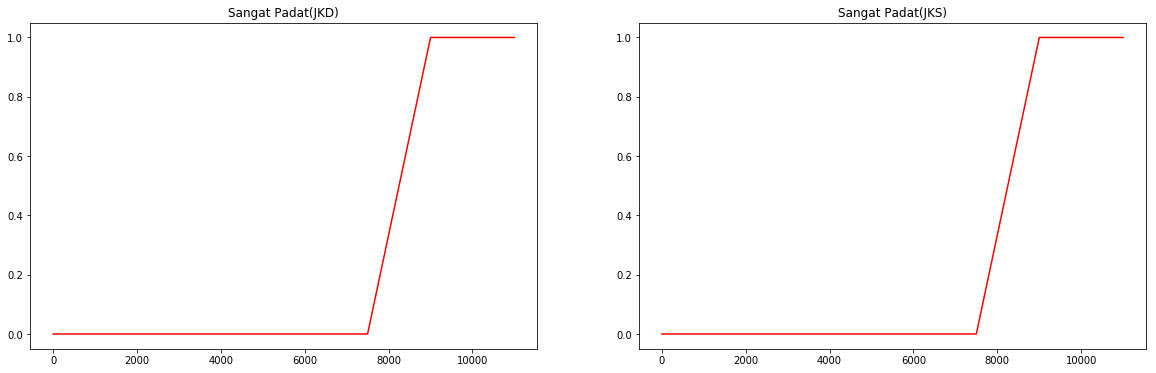

In [9]:
jkd_sp = fuzz.trapmf(jkd_x, [7500,9000,11000,11000])
jks_sp = fuzz.trapmf(jks_x, [7500,9000,11000,11000])
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20,6))
ax0.plot(jkd_x,jkd_sp, 'red', linewidth=1.5, label='JKD')
ax1.plot(jks_x,jks_sp, 'red', linewidth=1.5, label='JKS')
ax0.set_title('Sangat Padat(JKD)')
ax1.set_title('Sangat Padat(JKS)')

Plotting ke empat fungsi keanggotaan JKD

D:\Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


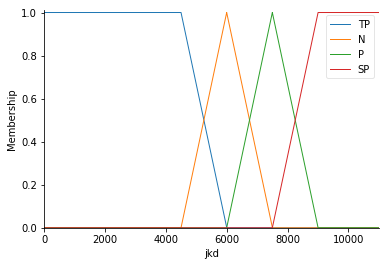

In [10]:
jkd.view()

Plotting ke empat fungsi keanggotaan JKS

D:\Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


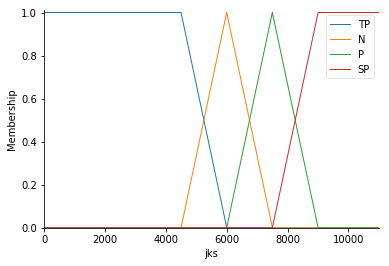

In [11]:
jks.view()

### Fuzzifikasi Durasi Lampu

#### Membership Function dari DL(Variabel Output)
- DL  : Cepat, Sedang, Agak Lambat, Lambat.

In [12]:
dl = ctrl.Consequent(np.arange(1,101,1),'dl')
dl_x = np.arange(1,101,1)

Domain Himpunan Fuzzy Variabel Durasi Lampu(DL):
1. **Cepat** [1 - 20] Detik
2. **Sedang** [14 - 50] Detik
3. **Agak Lama** [40 - 80] Detik
4. **Lama** [74 - 100] Detik

Menampilkan Input dan Output. Perintah Antecedent digunakan untuk input dan perintah Consequent digunakan untuk output.

In [13]:
dl['C'] = fuzz.trapmf(dl.universe, [1,1,10,20])
dl['SD'] = fuzz.trimf(dl.universe, [14,18,50])
dl['AL'] = fuzz.trimf(dl.universe, [40,60,80])
dl['L'] = fuzz.trapmf(dl.universe, [74,80,100,100])

Plotting fungsi keanggotaan $\mu C(x)$ pada DL

Text(0.5,1,'Durasi Lampu Cepat')

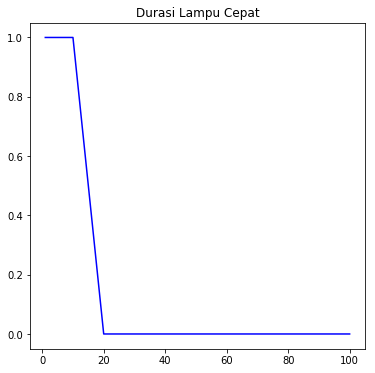

In [14]:
dl_c = fuzz.trapmf(dl_x, [1,1,10,20])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(dl_x,dl_c,'blue')
ax0.set_title('Durasi Lampu Cepat')

Plotting fungsi keanggotaan $\mu SD(x)$ pada DL

Text(0.5,1,'Durasi Lampu Sedang')

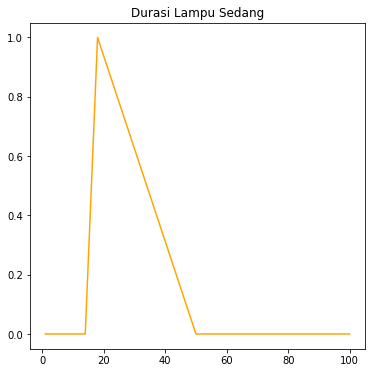

In [15]:
dl_sd = fuzz.trimf(dl_x, [14,18,50])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(dl_x,dl_sd,'orange')
ax0.set_title('Durasi Lampu Sedang')

Plotting fungsi keanggotaan $\mu AL(x)$ pada DL

Text(0.5,1,'Durasi Lampu Agak Lama')

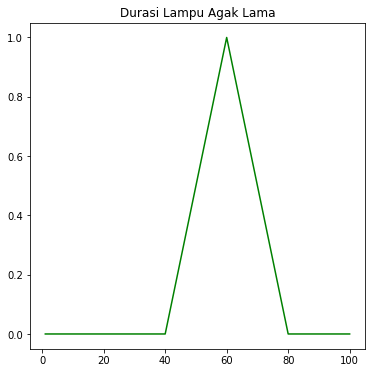

In [16]:
dl_al = fuzz.trimf(dl_x, [40,60,80])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(dl_x,dl_al,'green')
ax0.set_title('Durasi Lampu Agak Lama')

Plotting fungsi keanggotaan $\mu L(x)$ pada DL

Text(0.5,1,'Durasi Lampu Lama')

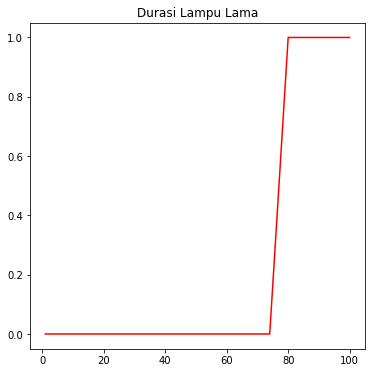

In [17]:
dl_l = fuzz.trapmf(dl_x, [74,80,100,100])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(dl_x,dl_l,'red')
ax0.set_title('Durasi Lampu Lama')

Plotting ke empat fungsi keanggotan DL

D:\Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


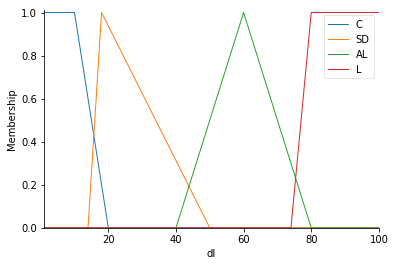

In [18]:
dl.view()

## RULES EVALUATION <a class="anchor" id="rules"></a>
Pada tahap ini, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Dari 2 input dimana masing-masing 2 input tersebut memiliki 4 kondisi, didapatkan 16 rule. 

INPUT 1 INPUT 2 | Tidak Padat(TP) | Normal(N) | Padat(P) | Sangat Padat(SP)
--- | --- | --- | --- |
Tidak Padat(TP) | Cepat(C) | Cepat(C) | Cepat(C) | Cepat(C)
Normal(N) | Sedang(SD) | Sedang(SD) | Sedang(SD) | Cepat(C)
Padat(P) | Agak Lama(AL) | Agak Lama(AL) | Sedang(SD) | Sedang(SD)
Sangat Padat(SP) | Lama(L) | Agak Lama(AL) | Sedang(SD) | Sedang(SD)

Dari tabel di atas dapat dibentuk Rule 
sebagai berikut: 
- IF JKD = TP,  AND JKS = TP,  THEN DL= C 
- IF JKD = TP,  AND JKS = N,  THEN DL= C 
- IF JKD = TP,  AND JKS = P,  THEN DL= C 
- IF JKD = TP,  AND JKS = SP,  THEN DL= C 
- IF JKD = N,  AND JKS = TP,  THEN DL= SD 
- IF JKD = N,  AND JKS = N,  THEN DL= SD 
- IF JKD = N,  AND JKS = P,  THEN DL= SD 
- IF JKD = N,  AND JKS = SP,  THEN DL= C
- IF JKD = P,  AND JKS = TP,  THEN DL= AL
- IF JKD = P,  AND JKS = N,  THEN DL= AL
- IF JKD = P,  AND JKS = P,  THEN DL= SD 
- IF JKD = P,  AND JKS = SP,  THEN DL= SD 
- IF JKD = SP,  AND JKS = TP,  THEN DL= L
- IF JKD = SP,  AND JKS = N,  THEN DL= AL
- IF JKD = SP,  AND JKS = P,  THEN DL= AL
- IF JKD = SP,  AND JKS = SP,  THEN DL= SD

In [19]:
rule1 = ctrl.Rule(jkd['TP'] & jks['TP'],dl['C'])
rule2 = ctrl.Rule(jkd['TP'] & jks['N'],dl['C'])
rule3 = ctrl.Rule(jkd['TP'] & jks['P'],dl['C'])
rule4 = ctrl.Rule(jkd['TP'] & jks['SP'],dl['C'])

rule5 = ctrl.Rule(jkd['N'] & jks['TP'],dl['SD'])
rule6 = ctrl.Rule(jkd['N'] & jks['N'],dl['SD'])
rule7 = ctrl.Rule(jkd['N'] & jks['P'],dl['SD'])
rule8 = ctrl.Rule(jkd['N'] & jks['SP'],dl['C'])

rule9 = ctrl.Rule(jkd['P'] & jks['TP'],dl['AL'])
rule10 = ctrl.Rule(jkd['P'] & jks['N'],dl['AL'])
rule11 = ctrl.Rule(jkd['P'] & jks['P'],dl['SD'])
rule12 = ctrl.Rule(jkd['P'] & jks['SP'],dl['SD'])

rule13 = ctrl.Rule(jkd['SP'] & jks['TP'],dl['L'])
rule14 = ctrl.Rule(jkd['SP'] & jks['N'],dl['AL'])
rule15 = ctrl.Rule(jkd['SP'] & jks['P'],dl['AL'])
rule16 = ctrl.Rule(jkd['SP'] & jks['SP'],dl['SD'])

**Keterangan**
- TP = Tidak Padat
- N = Normal
- P = Padat
- SP = Sangat Padat
- C = Cepat
- SD = Sangat Cepat
- AL = Agak Lambat
- L = Lambat

## MEKANISME INFERENSI <a class="anchor" id="mekanisme"></a>

In [20]:
dl_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11,
                                     rule12, rule13, rule14, rule15, rule16,])

## DEFUZZIFIKASI <a class="anchor" id="defuzz"></a>

In [21]:
tingkat = ctrl.ControlSystemSimulation(dl_ctrl)

Input jumlah kendaraan yang diatur(JKD) adalah sejumlah 5000 kendaraan dan jumlah kendaraan selanjutnya(JKS) adalah sejumlah 6000

In [22]:
tingkat.input['jkd'] = 4746
tingkat.input['jks'] = 7435

Melakukan perhitungan defuzzifikasi

In [23]:
tingkat.compute()

Mencetak hasil output defuzzifikasi

**Output perhitungan python**

In [24]:
print (tingkat.output['dl'])

15.324064556913646


Plotting fungsi keangggotaan jkd setelah dimasukkan input nilai pada jkd.

D:\Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


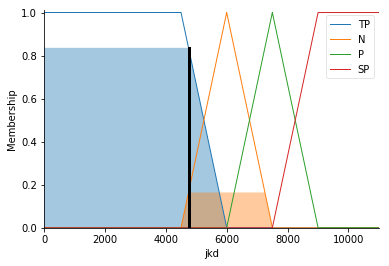

In [25]:
jkd.view(sim=tingkat)

Plotting fungsi keangggotaan jks setelah dimasukkan input nilai pada jks.

D:\Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


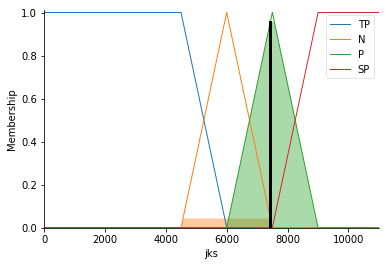

In [26]:
jks.view(sim=tingkat)

Plotting fungsi keangggotaan durasi lampu setelah dimasukkan input nilai pada durasi lampu.

D:\Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


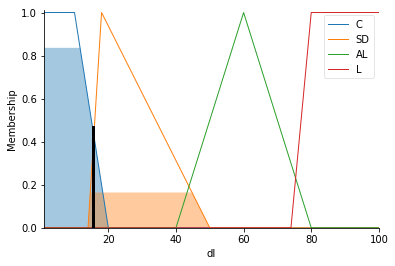

In [27]:
dl.view(sim=tingkat)

## PERHITUNGAN MANUAL <a class="anchor" id="manual"></a>

**SOAL**

Berapakah lama durasi lampu jika jumlah kendaraan yang diatur(JKD) senilai 4746 kendaraan dan jumlah kendaraan selanjutnya(JKS) senilai 7435 kendaraan.

Jumlah Kendaraan:
$$Tidak padat= 1-6000  Kendaraan$$
$$Normal = 4500-7500  Kendaraan$$
$$Padat = 6000-9000  Kendaraan$$
$$Sangat Padat = 7500-11000  Kendaraan$$

**1. Fuzzifikasi**

Metode inferensi

**Himpunan jalan 1**

- $\mu TP[4746]=(\frac{6000-4746}{6000-4500})=\frac{1254}{1500}=0.84$ <br>
- $\mu N[4746]=(\frac{4746-4500}{6000-4500})=\frac{246}{1500}=0.16$ <br>

**Himpunan jalan 2**

- $\mu N[7435]=(\frac{7500-7435}{7500-6000})=\frac{65}{1500}=0.04$ <br>
- $\mu P[7435]=(\frac{7435-6000}{7500-6000})=\frac{1435}{1500}=0.96$ <br>

Rule Evaluation

JKD/JKS | $\mu$TP | $\mu$N | $\mu$P | $\mu$SP
--- | --- | --- | --- |
4746 | 0,84 | 0,16 | 0 | 0
7435 | 0 | 0,04 | 0,96 | 0

IF JKD = TP, AND JKS = N, THEN DL= C <br>
$\alpha 2 = \mu JKD \bigcap \mu JKS = min(\mu TP[4746], \mu N[7455]) = min [0,84;0,04] = 0,04$

IF JKD = TP, AND JKS = P, THEN DL= C <br>
$\alpha 3 = \mu JKD \bigcap \mu JKS = min(\mu TP[4746], \mu P[7455]) = min [0,84;0,96] = 0,84$

IF JKD = N,  AND JKS = N, THEN DL= SD <br>
$\alpha 6 = \mu JKD \bigcap \mu JKS = min(\mu N[4746], \mu N[7455]) = min [0,16;0,04] = 0,04$

IF JKD = N,  AND JKS = P, THEN DL= SD <br>
$\alpha 7 = \mu JKD \bigcap \mu JKS = min(\mu N[4746], \mu P[7455]) = min [0,16;0,96] = 0,16$

**2. AGREGASI DAN DEFUZZIFIKASI**

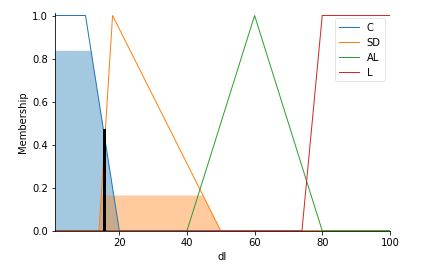

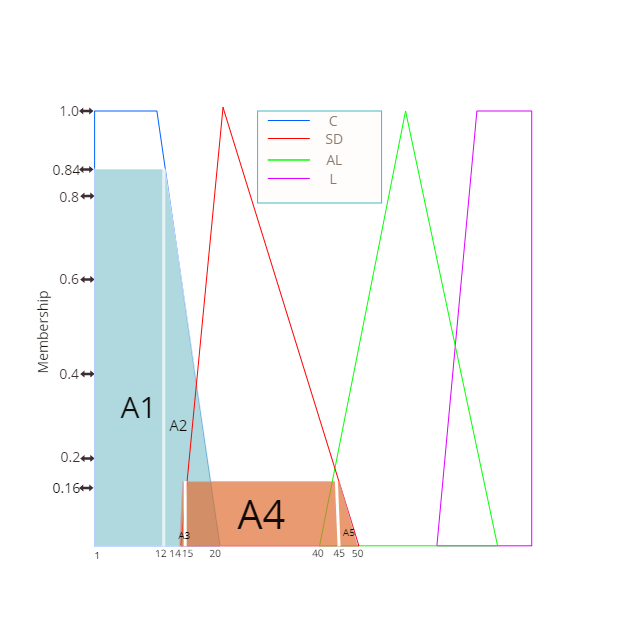

\begin{equation}
  DL['C'] = \mu C(x)=\begin{cases}
    1, & \text{$1\leq x \leq 10$}.\\
    \left.(20 - x) \,  \right/(20 - 10) , & \text{$10 \leq x \leq 20$}.\\
    0, & \text{$x\geq 20$}.
  \end{cases}
  \\
    DL['SD'] = \mu SD(x)=\begin{cases}
    0, & \text{$x\leq 14$ atau $x\geq50$}.\\
    \left.(x - 14)\, \right/(18 - 14) , & \text{$14 \leq x \leq 18$}.\\
    \left.(50 - x)\, \right/(50 - 20) , & \text{$18 \leq x \leq 50$}.\\
  \end{cases}
\end{equation}

**3. Rumus**

<font size = 15>
$$
Hasil = \frac {\sum XiAi}{\sum Ai}
$$
</font>

Untuk mencari nilai A kita menggunakan rumus
$A = P x L$ untuk persegi panjang dan untuk menggunakan rumus $A = \frac {1}{2} (P x L)$ untuk segitiga.

Rentang Nilai A
$$A1 = 1 - 12 \square$$
$$A2 = 12 - 20 \triangle$$
$$A3 = 14 - 15 \triangle$$
$$A4 = 15 - 45 \square$$
$$A5 = 45 - 50  \triangle$$

Mencari nilai A1

$
A1 = P \times L \\
A1 = (11) \times (0.84) \\ 
A1 = 9.24 \\
$

Mencari nilai A2

$
A2 = \frac {1}{2} (P \times L) \\
A2 = 0.5 (8 \times 0.84) \\ 
A2 = 3.36 \\
$

Mencari nilai A3

$
A3 = \frac {1}{2} (P \times L) \\
A3 = 0.5 (1 \times 0.16) \\ 
A3 = 0.08 \\
$

Mencari nilai A4

$
A4 = P \times L \\
A4 = (30) \times (0.16) \\ 
A4 = 4.8 \\
$

Mencari nilai A5

$
A5 = \frac {1}{2} (P \times L) \\
A5 = 0.5 (5 \times 0.16) \\ 
A5 = 0.4 \\
$

Untuk mencari nilai X nya kita akan menggunakan rumus $X = a + \frac{2}{3}(b-a)$ untuk segitiga Atas/sisi kiri & $X = a + \frac{1}{3}(b-a)$ untuk segitiga Bawah/sisi kanan, sedangkan untuk persegi panjang menggunakan rumus $X = \frac{1}{2}(b+a)$

**Keterangan**
- b = Batas atas
- a = Batas bawah

Mencari nilai X1

$
X1 = \frac{1}{2}(b+a) \\
X1 = \frac{1}{2}(12 + 1) \\ 
X1 = \frac{13}{2} \\
X1 = 6.5\\
$

Mencari nilai X2

$
X2 = a +\frac{1}{3} (b - a) \\
X2 = 12 + \frac{1}{3} (20 - 12) \\ 
X2 = 12 + \frac{8}{3} \\
X2 = 12 +  2.666666‬\\
X2 = 14.666666\\
$

Mencari nilai X3

$
X3 = a +\frac{2}{3} (b - a) \\
X3 = 14 + \frac{2}{3} (15 - 14) \\ 
X3 = 14 + \frac{2}{3} \\
X3 = 14 +  0.666666‬\\
X3 = 14.6666‬66\\
$

Mencari nilai X4

$
X4 = \frac{1}{2}(b+a) \\
X4 = \frac{1}{2}(45 + 15) \\ 
X4 = \frac{60}{2} \\
X4 = 30\\
$

Mencari nilai X5

$
X5 = a +\frac{1}{3} (b - a) \\
X5 = 45 + \frac{1}{3} (50 - 45) \\ 
X5 = 45 + \frac{5}{3} \\
X5 = 45 +  1.666666\\
X5 = 46.666666‬\\
$

Setelah nilai A dan X didapatkan maka selanjutnya adalah memasukan nya kedalam rumus utama.

$$Hasil = \frac{\sum XiAi}{\sum Ai}$$

$$Hasil = \frac{(X1 \times A1) + (X2 \times A2) + (X3 \times A3) + (X4 \times A4) + (X5 \times A5)}{A1 + A2 + A3 + A4 + A5}$$

$$Hasil = \frac{(6.5 \times 9.24) + (14.666666 \times 3.36) + (14.666666 \times 0.08) + (30 \times 4.8) + (46.666666 \times 0.4)}{9.24 + 3.36 + 0.08 + 4.8 + 0.4}$$

$$Hasil = \frac{(60.06‬‬) + (49.27999776‬) + (1.17333328‬‬) + (144‬) + (18.6666664)}{17.88}$$

$$Hasil = \frac{273.17999744‬}{17.88‬‬}$$

$$Hasil = 15.27852334$$

### Analisa

Hasil output yang didapatkan adalah 15.27852334 detik dengan menggunakan perhitungan manual sedangkan di python output yang didapatkan adalah sebesar 15.32406455 detik. Terdapat perbedaan sebesar 0.04554121‬‬‬ detik

Selisih tersebut terjadi disebabkan oleh pengambilan angka yang berkoma dengan hanya mengambil 6 dibelakang koma, makanya menyebabkan sedikit selisih angka di perhitungan manual dan python.

<h2 align = "center">***Terimakasih Sebelumnya***</h2>